<div style="border: 2px solid black; padding: 10px; background-color: #f9f9f9;">
The code below imports the first day of the CIC_IDS 2018 dataset.
For data preprocessing all the "attack data" is removed leaving only the "benign data" thsi leaves roughly 660,000 rows which i took the first 500,000 rows and split them into chunks based time intervals of 1 second. This process results in 31,249 chunks.

Annoyingly unlike the 2017 CIC dataset there are no days with only benign data so removing the benign data could possibly affect how the autoencoder percieves "normal data" and reconstructs it, we can address this later.  
</div>

In [7]:
import pandas as pd

# Replace this with the actual path to your CSV file
file_path = './archive-2/02-14-2018.csv'

# Step 1: Load the CSV into a DataFrame
data = pd.read_csv(file_path)

# Step 2: Filter only 'Benign' rows
if 'Label' in data.columns:
    data = data[data['Label'] == 'Benign']
    print(f"Number of benign rows: {len(data)}")
else:
    print("The 'Label' column does not exist in the dataset.")
    data = pd.DataFrame()  # Empty DataFrame if 'Label' is missing

# Step 3: Fix the timestamp issue - remove invalid or incorrect timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', format='%d/%m/%Y %H:%M:%S')
data = data.dropna(subset=['Timestamp'])  # Remove rows with invalid Timestamps
data = data[data['Timestamp'] >= '2018-02-14']  # Keep only rows starting from 2018-02-14

# Step 4: Limit the dataset to the first 500,000 rows
data_limited = data.head(500000)

# Step 5: Extract only the second-level information
data_limited['Second'] = data_limited['Timestamp'].dt.floor('S')

# Step 6: Group by the 'Second' column to create time chunks
grouped_chunks = data_limited.groupby('Second')

# Step 7: Print a summary of the chunks
num_chunks = len(grouped_chunks)
time_start = data_limited['Second'].min()
time_end = data_limited['Second'].max()

print(f"Total number of chunks: {num_chunks}")
print(f"Time range: {time_start} to {time_end}")

# Optional: Save cleaned dataset for further use
#output_file = "cleaned_limited_benign_data_500k.csv"
#data_limited.to_csv(output_file, index=False)
#print(f"Cleaned and limited benign data saved to {output_file}")


Number of benign rows: 667626


/var/folders/7y/3m8qfmqn671cp1hy9jz_wlvw0000gn/T/ipykernel_68334/3164354583.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limited['Second'] = data_limited['Timestamp'].dt.floor('S')


Total number of chunks: 31249
Time range: 2018-02-14 01:00:00 to 2018-02-14 12:59:59
Cleaned and limited benign data saved to cleaned_limited_benign_data_500k.csv


<div style="border: 2px solid black; padding: 10px; background-color: #f9f9f9;">
the graphs below show the spread of the size of the chunks, the mean of the size of the chunks is 16 rows , so roughly 16 rows a second.
This method does hagve any limits on teh chunks so the sizes can vary a lot , not sure how this will be handled by the autoencoders when the embeeders reduce the dimensions to all the same size. i.e a chunk fo 5 rows will eb put to the same size as a chunk with 200 rows etc 
</div>

Mean number of rows per chunk: 16.00


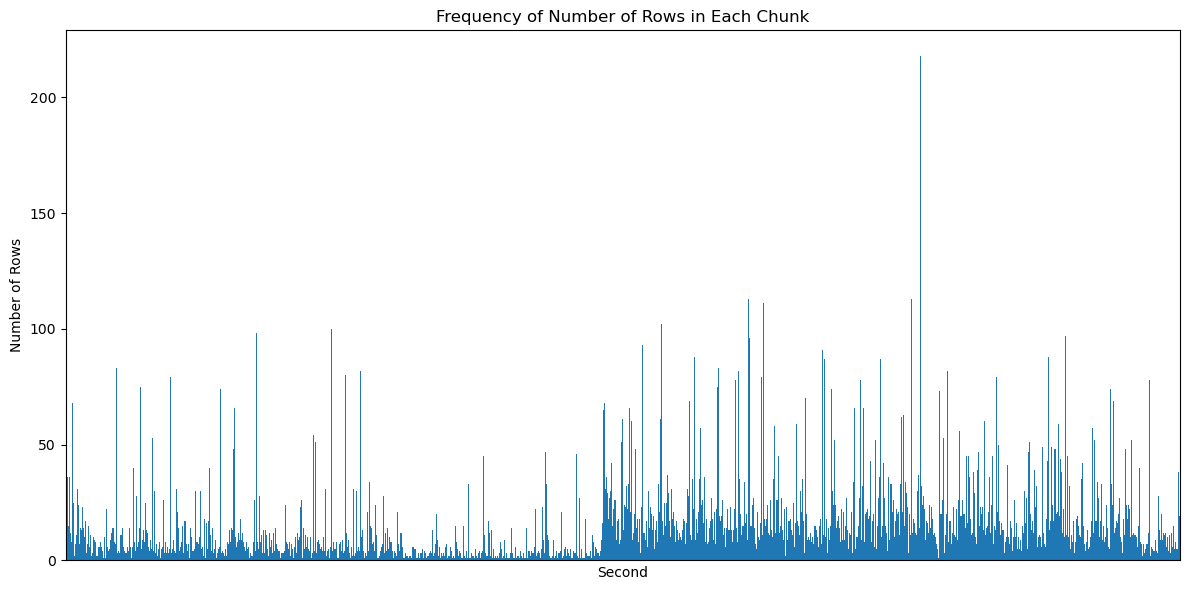

In [9]:
import matplotlib.pyplot as plt

# Step 8: Calculate the number of rows in each chunk
chunk_sizes = grouped_chunks.size()

# Step 9: Calculate the mean number of rows per chunk
mean_chunk_size = chunk_sizes.mean()
print(f"Mean number of rows per chunk: {mean_chunk_size:.2f}")

# Step 10: Plot the frequency of the number of rows in each chunk
plt.figure(figsize=(12, 6))
chunk_sizes.plot(kind='bar', width=1.0)
plt.xlabel('Second')
plt.ylabel('Number of Rows')
plt.title('Frequency of Number of Rows in Each Chunk')
plt.xticks([])  # Remove x-tick labels for better readability
plt.tight_layout()
plt.show()


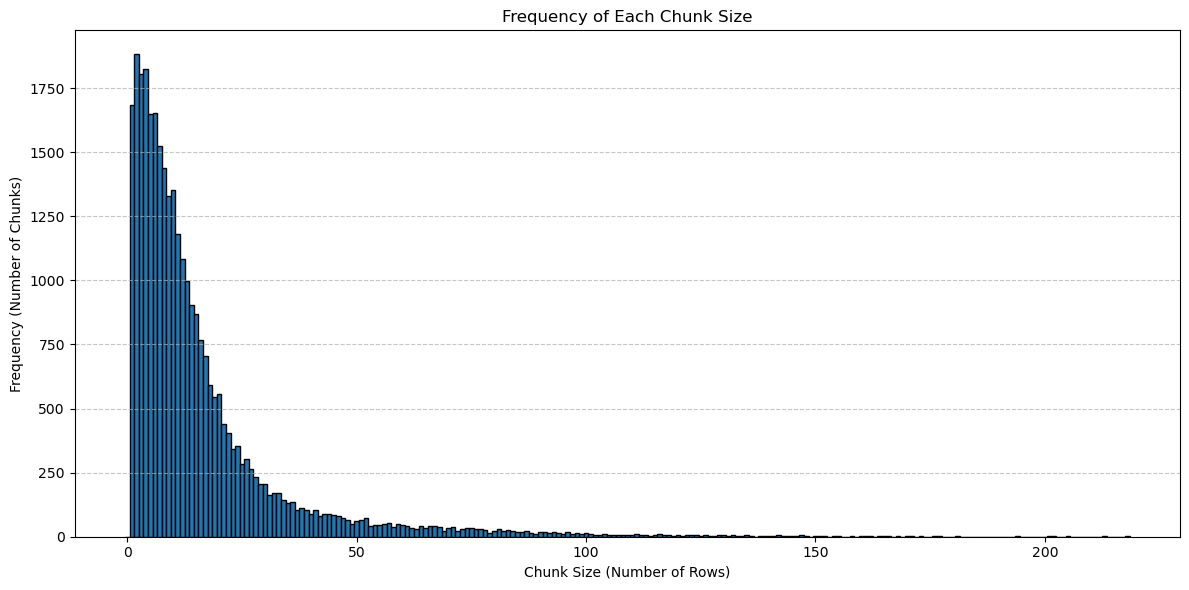

In [14]:
import numpy as np

max_chunk_size = chunk_sizes.max()
all_sizes = np.arange(0, max_chunk_size + 1)

# Count the frequency of each chunk size
chunk_size_counts = chunk_sizes.value_counts().reindex(all_sizes, fill_value=0)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(all_sizes, chunk_size_counts, width=1.0, edgecolor='black')
plt.xlabel('Chunk Size (Number of Rows)')
plt.ylabel('Frequency (Number of Chunks)')
plt.title('Frequency of Each Chunk Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()